## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Imorting dataset containing student score and hours studied

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

## Inspecting the first five elements from the imported dataset

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Identifying the correlation between hours studied and scores obtained by students

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Correlation visualisation

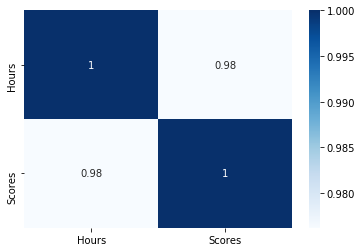

In [6]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### Note
From the above correlation table it can be inferred that number of hours studied have a high positive correlation with the marks obtained

## Description of the dataset

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking for null values

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Note 
There are no null values in this dataset

## Plotting Hours vs Scores 
### Scatter Plot

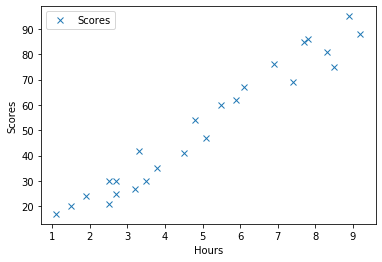

In [9]:
df.plot(x = 'Hours', y = 'Scores', style = 'x')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Note
It is observed that there is a linear relationship between hours and scores, as the number of hours increses there is also an increase in the scores obtained

## Distribution of Scores and Hours 

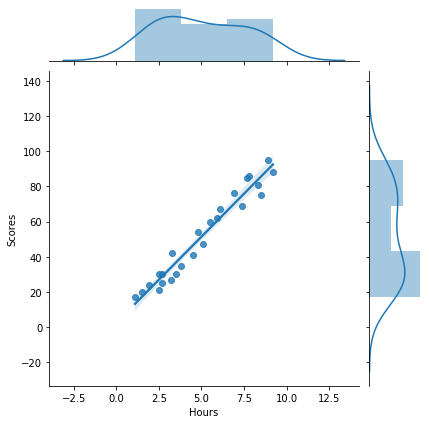

In [10]:
sns.jointplot(x = 'Hours', y = 'Scores', data = df, kind = 'reg')

## Bar plot representation of Scores vs Hours

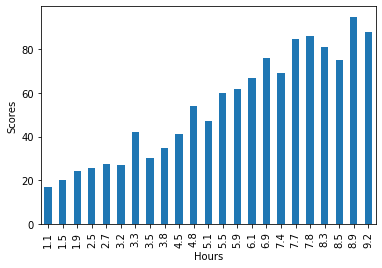

In [11]:
df.groupby('Hours')['Scores'].median().plot.bar()
plt.ylabel('Scores')
plt.show()

#### Note
It is observed that there is a linear relationship between hours and scores, as the number of hours increses there is also an increase in the scores obtained

## Line graph for Scores vs Hours

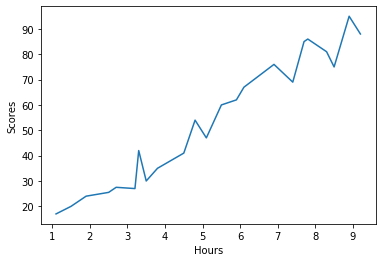

In [12]:
df.groupby('Hours')['Scores'].median().plot(kind = 'line')
plt.ylabel('Scores')
plt.show()

#### Note
As the number of hours increses there is also an increase in the scores obtained

## Feature and Target selection
* Feature(x) = Number of hours studied
* Target(y) = Scores obtained

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Splitting the dataset for training and testing

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

## Training Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluating Train and Test scores

In [16]:
print('Training Score : ', regressor.score(x_train, y_train))
print('Test Score : ', regressor.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434516


## Predicting Scores

In [17]:
y_pred = regressor.predict(x_test)

## Comparing Actual Score and Predicted Score

In [18]:
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred})
print(output.head())

   Actual Score  Predicted Score
0            17        11.029003
1            21        25.628017
2            24        19.371297
3            88        95.494730
4            76        71.510634


## Regression mapping for training data vs predictions

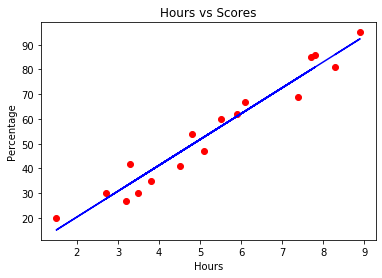

In [19]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

## Regression mapping for testing data vs predictions

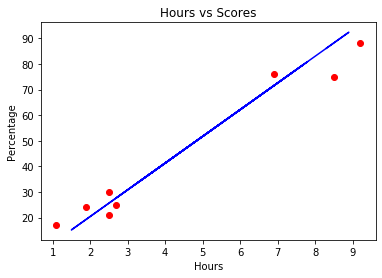

In [20]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

## Evaluating our model

In [21]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted scores = {}".format(own_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


## Mean Absolute Error

In [46]:
from sklearn import metrics
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  5.936576124243742


## Root Mean Square Error

In [47]:
print('Root mean squaren error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squaren error :  6.665333111498132
